In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Actividad 03: Errores

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---

# 1
La serie de Taylor para la función seno ($\sin(x)$) centrada en $a=0$ (también conocida como la serie de Maclaurin) se expresa de la siguiente manera:

> Añadir blockquote



$$\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$$

* Encontrar la aproximación para $x = \pi/4$ cambiando el valor de tolerancia, ¿Qué puede concluir de la serie?
* Hallar el error relativo y porcentual.
* Grafique los valores asociados a la serie después de cada iteración.
* Repita para la serie:
$$\ln(1+x) = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} x^n$$

In [4]:
def seno(tolerancia,max_iter,x):
    seno = 0
    n = 0
    terminos = []
    x = (x/180)* np.pi
    while n < max_iter:
        
        #Calculamos el primer termino
        termino = ((-1)**n/factorial(2*n+1))*np.power(x,2*n+1)
        terminos.append(termino)
        #Guardamos la suma
        seno += termino
        #Comparamos con la tolerancia
        if abs(termino/seno) < tolerancia:
            return seno, terminos
            
        # si no se cumple, aumentamos n en 1
        n+=1
        
    return print('Maximo de iteraciones alcanzado sin convergencia')



In [5]:
seno, terminos = seno(1e-18,10000000000,45) #Obtenemos el resultado

el seno de 45° es :0.7071067811865475


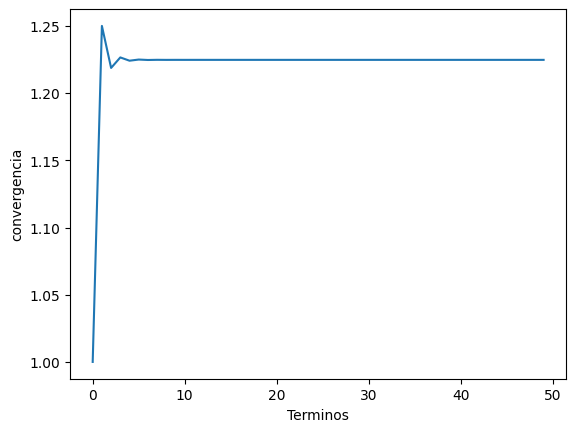

In [23]:
print(f'el seno de 45° es :{seno}') #Imprimimos el resultado
plt.plot(terminos) # Hacemos una grafica de la convergencia de los terminos
plt.xlabel('Terminos')
plt.ylabel('convergencia')
plt.show()

In [7]:
def calcular_seno_tolerancia(tolerancia,x):
    '''Esta función calcula el seno y el numero de iteraciones para alcanzar el valor.
    Entrada x, tolerancia
    Salida numero de iteraciones y seno
    '''
    #Pasamos a radianes
    x = (x/180)*np.pi

    #Inicializamos las variables
    seno = 0
    n = 0
    
    while True:
        #Calculamos termino a termino
        termino = ((-1)**n/factorial(2*n+1))*np.power(x,2*n+1)
        #Acomulamos la suma de los terminos
        seno += termino
        #Miramos si el valor llevado cumple con la tolerancia
        if abs(seno - np.sin(x)) < tolerancia:
            break
        #aumentamos el n
        n+=1
    #Retornamos el valor del seno y el numero de iteraciones 
    return seno, n

calcular_seno_tolerancia(1e-10,45)

(0.7071067811796194, 5)

In [8]:
def logaritmo_natural(tolerancia, iteraciones, x):
    
    logaritmo = 0
    x = x - 1  # Convertimos ln(x) a ln(1 + x)
    n = 1
    terminos = []
    
    while n < iteraciones:
        termino = ((-1)**(n-1)) * (x**n) / n
        terminos.append(termino)
        logaritmo += termino
        
        if abs(termino/logaritmo) < tolerancia:
            return logaritmo, terminos, n
        n += 1
    
    return logaritmo, terminos, n

        

0.6931506462959872 144269


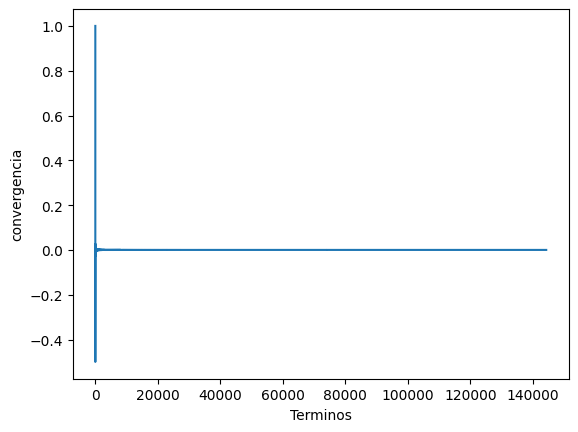

In [10]:
logaritmo, terminos, n = logaritmo_natural(1e-5, 1000000, 2)

print(logaritmo, n)
plt.plot(terminos)
plt.xlabel('Terminos')
plt.ylabel('convergencia')
plt.show()

# 2

La serie de Taylor para la función $(1+x)^\alpha$, conocida como la **serie binomial**, centrada en $a=0$ está dada por:

$$(1+x)^\alpha = \sum_{n=0}^{\infty} \binom{\alpha}{n} x^n = 1 + \alpha x + \frac{\alpha(\alpha-1)}{2!} x^2 + \frac{\alpha(\alpha-1)(\alpha-2)}{3!} x^3 + \cdots$$

donde $\binom{\alpha}{n}$ es el coeficiente binomial generalizado.

Considere el caso donde $\alpha = 1/2$, lo que nos da la serie de Taylor para $\sqrt{1+x}$:

$$\sqrt{1+x} = \sum_{n=0}^{\infty} \binom{1/2}{n} x^n = 1 + \frac{1}{2} x - \frac{1}{8} x^2 + \frac{1}{16} x^3 - \frac{5}{128} x^4 + \cdots$$

a.  **Encontrar la aproximación para $x = 0.5$** cambiando el número de términos incluidos en la suma. ¿Qué puedes concluir sobre la convergencia de la serie para este valor de $x$?

b.  **Hallar el error relativo y porcentual** para cada aproximación, utilizando el valor real de $\sqrt{1+0.5} = \sqrt{1.5} \approx 1.224744871$.


c.  **Grafique los valores asociados a la serie después de cada iteración.** Muestra cómo la serie se acerca al valor real a medida que se incluyen más términos.

d. **Utilizando el criterio de tolerancia, evalue 6 a 7 valores diferentes**, y encuentre cuántos términos son necesarios para alcanzar dicha resolución. Realice un gráfico de la evolución del sistema.



In [11]:
#Hacemos una funcion para calcular los coeficientes binomiales y el factorial

def coef_binomial(alfa, m):
    coef = 1
    #Lo inicializamos en 1 para que la miltiplicación se conserve
    #Hacemos un ciclo para que dependiendo de la iteracion que llevamos calcule el coeficiente 
    for j in range(m):
        coef *= (alfa - j)
        #Calculamos tambien el factorial
    return coef / factorial(m)
    
#Definimos la funcion de la seie binomial 
def serie_binomial(x, alfa=0.5, n=2000, e=1e-18):
    suma = 1  # Término i=0
    lista = []
    for i in range(1, n):
        #Calculamos cada termino
        termino = coef_binomial(alfa, i) * (x ** i)
        #Lo guardamos en una lista
        lista.append(suma)
        #Acomulamos
        suma += termino
        #Comprobamos si cumple con la tolerancia
        if abs(termino) < e:
            return suma,lista
    raise ValueError("Máximo número de iteraciones alcanzado sin convergencia.")


In [12]:
valor, terminos = serie_binomial(0.5)
print(valor)

1.2247448713915894


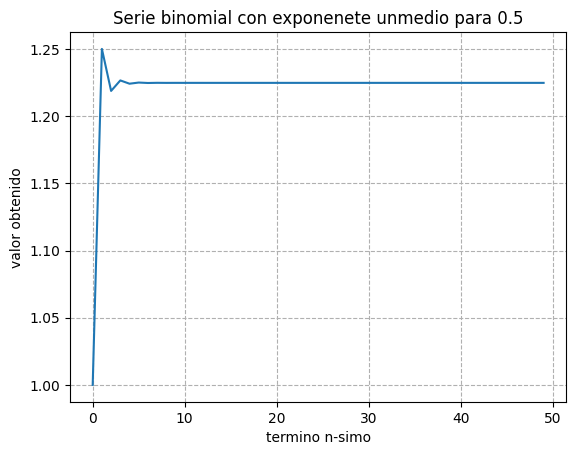

In [15]:
import matplotlib.pyplot as plt
plt.title('Serie binomial con exponenete unmedio para 0.5')
plt.plot(terminos)
plt.xlabel('termino n-simo')
plt.ylabel('valor obtenido')
plt.grid(ls = '--')
plt.show()

### Calculo del error porcentual por iteracion

In [16]:
#Definimos la funcion de la seie binomial 
def serie_binomial_error(x, alfa=0.5, n=2000, e=1e-18, valor_comparativo = 1.224744871):
    suma = 1  # Término i=0
    error_relativo = []
    error_porcentual = []
    for i in range(1, n):
        
        #guardamos en una lista los errorres
        error_porcentual.append((valor_comparativo / suma) * 100 - 100)
        error_relativo.append(valor_comparativo - suma)
        
        #Calculamos cada termino
        termino = coef_binomial(alfa, i) * (x ** i)

        #Acomulamos
        suma += termino
        
        #Comprobamos si cumple con la tolerancia
        if abs(termino) < e:
            return error_porcentual, error_relativo
    raise ValueError("Máximo número de iteraciones alcanzado sin convergencia.")


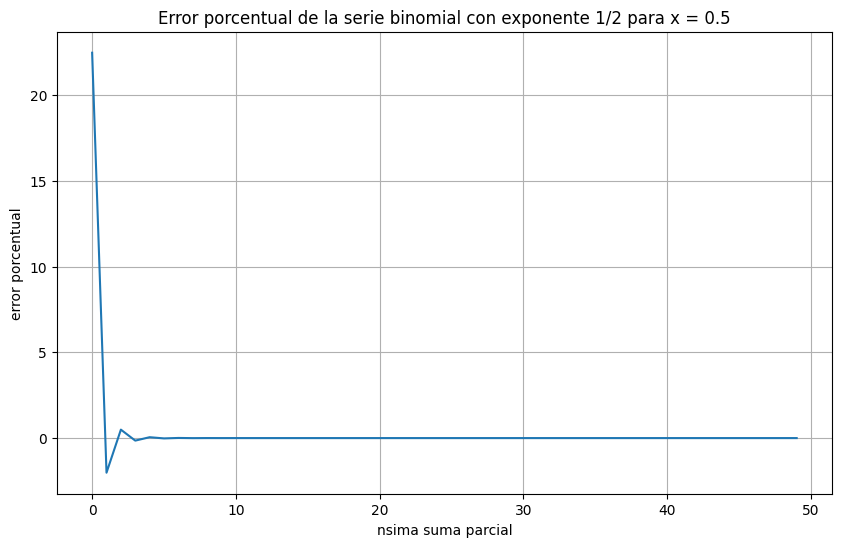

In [17]:
porcentual, relativo =serie_binomial_error(0.5)
plt.figure(figsize=(10,6))
plt.title('Error porcentual de la serie binomial con exponente 1/2 para x = 0.5')
plt.plot(porcentual)
plt.xlabel('nsima suma parcial')
plt.ylabel('error porcentual')
plt.grid()

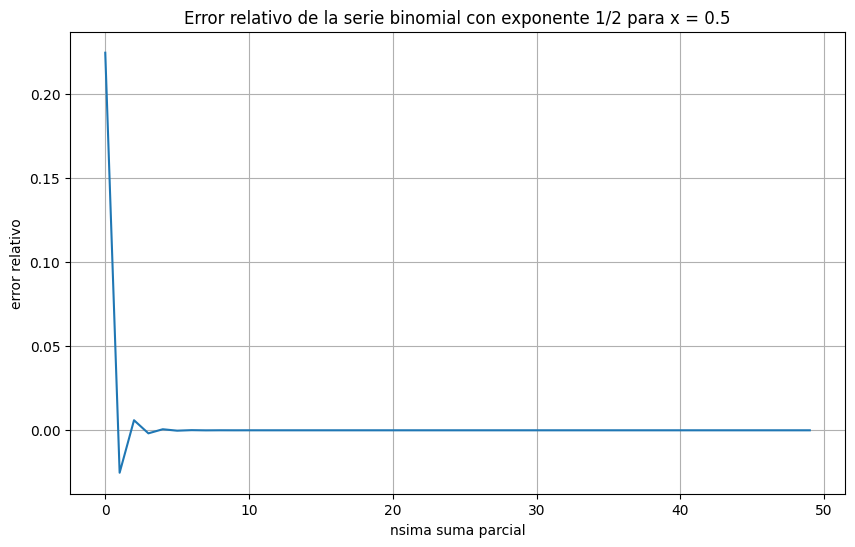

In [18]:
plt.figure(figsize=(10,6))
plt.title('Error relativo de la serie binomial con exponente 1/2 para x = 0.5')
plt.plot(relativo)
plt.xlabel('nsima suma parcial')
plt.ylabel('error relativo')
plt.grid()

In [60]:
import numpy as np

In [19]:
#Definimos la funcion de la seie binomial 
tolerancias = np.logspace(-18,-6,13)
def serie_binomial_Tolerancias(x, tolerancias, alfa=0.5, n=20000 ):
    
    numero_terminos= []
    for j in range(0,len(tolerancias)):
        
        suma = 1  # Término i=0
        
        for i in range(1, n):
            
            #Calculamos cada termino
            termino = coef_binomial(alfa, i) * (x ** i)
            #Acomulamos
            suma += termino
            #Comprobamos si cumple con la tolerancia
            
            if abs(termino) < tolerancias[j]:
                numero_terminos.append(i)
                break
    return numero_terminos

In [20]:
numero_de_iteraciones = serie_binomial_Tolerancias(0.5, tolerancias)

[50, 47, 44, 41, 37, 34, 31, 28, 25, 22, 19, 16, 13]


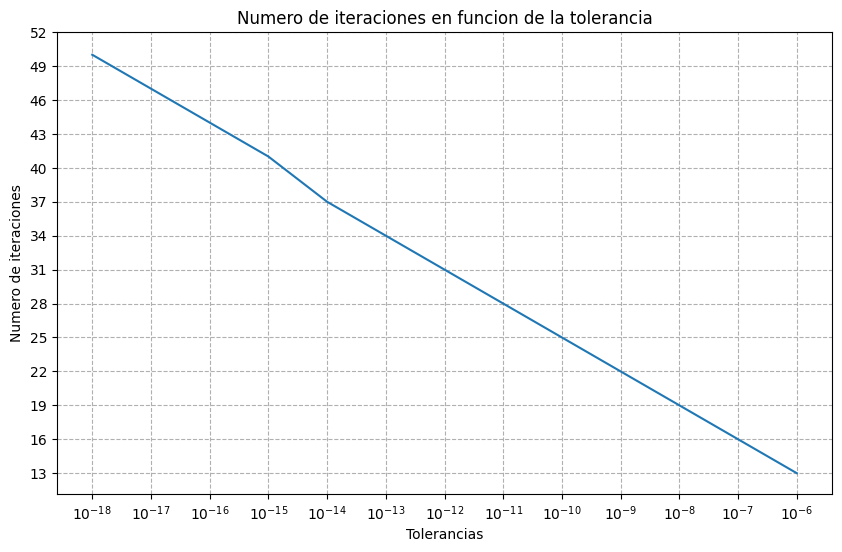

In [21]:
plt.figure(figsize=(10,6))
plt.title('Numero de iteraciones en funcion de la tolerancia')
plt.plot(tolerancias,numero_de_iteraciones)
plt.xscale('log')
plt.xlabel('Tolerancias')
plt.ylabel('Numero de iteraciones')
plt.yticks(np.arange(13,55,3))
plt.xticks(tolerancias)
plt.grid(ls="--")
plt.show()